## Imports

In [91]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd
import numpy as np

## Importa a base de Dados

In [92]:
import pandas as pd
from ucimlrepo import fetch_ucirepo 

# fetch dataset 
adult = fetch_ucirepo(id=2) 

# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

# Combina X e y em um único DataFrame
df = pd.DataFrame(X)
df['target'] = y

# Exibe as primeiras linhas do DataFrame
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country target  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [93]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
label_encoder_age = LabelEncoder()
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital_status = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_native_country = LabelEncoder()
label_encoder_target = LabelEncoder()

df2 = df.copy()
df2.iloc[:, 1] = label_encoder_workclass.fit_transform(df.iloc[:, 1])
df2.iloc[:, 3] = label_encoder_education.fit_transform(df.iloc[:, 3])
df2.iloc[:, 5] = label_encoder_marital_status.fit_transform(df.iloc[:, 5])
df2.iloc[:, 6] = label_encoder_occupation.fit_transform(df.iloc[:, 6])
df2.iloc[:, 7] = label_encoder_relationship.fit_transform(df.iloc[:, 7])
df2.iloc[:, 8] = label_encoder_race.fit_transform(df.iloc[:, 8])
df2.iloc[:, 9] = label_encoder_sex.fit_transform(df.iloc[:, 9])
df2.iloc[:, 13] = label_encoder_native_country.fit_transform(df.iloc[:, 13])
# df2.iloc[:, 14] = label_encoder_target.fit_transform(df.iloc[:, 14])
df2.loc[df['target'] == '<=50K.', 'target'] = '<=50K'
df2.loc[df['target'] == '>50K.', 'target'] = '>50K'

df2.head(1)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K


In [94]:
# Pega as colunas transformadas 
x_df = df2.iloc[:, 0:14].values

# Pega a base de teste
y_df = df2.iloc[:, 14].values

In [95]:
from sklearn.naive_bayes import GaussianNB
naive = GaussianNB()
naive.fit(x_df, y_df)
previsao = naive.predict(x_df)

In [96]:
previsao

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype='<U5')

In [97]:
print(y_df)

['<=50K' '<=50K' '<=50K' ... '<=50K' '<=50K' '>50K']


### Verifica a Assertividade do Modelo

In [98]:
# Verifica se o modelo tem uma boa assertividade
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_df, previsao)

0.7947872732484337

In [99]:
# Puxa todos os itens que sairam do padrão 
confusion_matrix(y_df, previsao)

array([[35196,  1959],
       [ 8064,  3623]], dtype=int64)

### Utiliza outra biblioteca para verificar se o Modelo está atendendo as Respostas Esperadas

0.7947872732484337

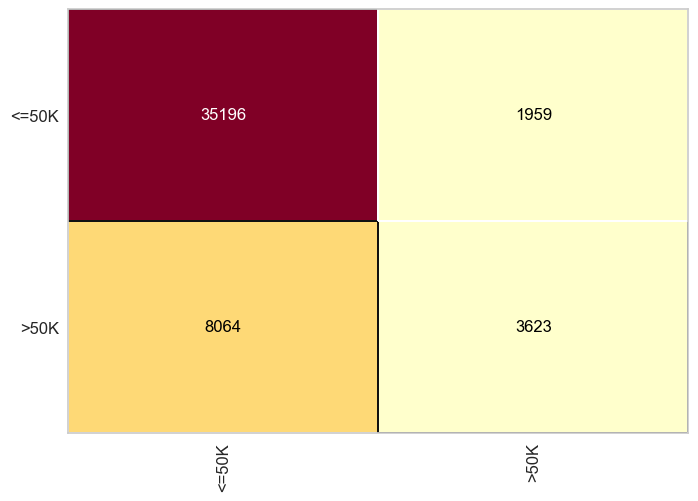

In [100]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(naive)
cm.fit(x_df, y_df)
cm.score(x_df, y_df)

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_df, previsao))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88     37155
        >50K       0.65      0.31      0.42     11687

    accuracy                           0.79     48842
   macro avg       0.73      0.63      0.65     48842
weighted avg       0.77      0.79      0.77     48842

